# Гипотезы для увеличения выручки интернет-магазина

**Цель исследования** — проанализировать результаты A/B теста, понять, стоит ли продолжать его или надо остановить.  

**Ход исследования**:  

Необходимо проанализировать предоставленные данные, составить приоритезацию гипотез методами ICE, RICE, проанализировать результаты теста A/B.

Таким образом, исследование пройдёт в три **этапа**:  

1. Обзор, предобработка данных и приоритезация гипотез; 
2. Анализ данных проведённого A/B теста;  
3. Вывод и рекомендации по произведённому анализу.

## Приоритезация гипотез

Для начала импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

Выгрузим датафрейм для ознакомления с данными:

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')
display (df)
pd.set_option('display.max_colwidth', None)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Проверим датафрейм на типы данных, также на пустые значения:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
print ('Количество пустых значений:')
print (df.isna().sum())
print ('Количество дубликатов:', df.duplicated().sum())

Количество пустых значений:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
Количество дубликатов: 0


Данные качественные, без пропусков, без дубликатов. Можно переходить к следующему этапу - приоритезации гипотез.

Применим фреймворк ICE для приоритезации гипотез, результаты отсортируем по убыванию:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [5]:
df['ICE'] = df['Impact']*df['Confidence']/df['Efforts']

In [6]:
display (df.sort_values('ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Следует посмотреть, как изменится порядок, если мы применим RICE, который в отличие от ICE, учитывает кол-во пользователей, которых затронет наше изменение.

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [7]:
df['RICE'] = df['Reach']*df['Impact']*df['Confidence']/df['Efforts']

In [8]:
display (df.sort_values('RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Можно заметить, что при применении метода ICE в первую тройку вошли следующие гипотезы в порядке убывания:  
* Запустить акцию, дающую скидку на товар в день рождения;  
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;  
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.  

Однако если использовать RICE, который учитывает кол-во пользователей, которых затронет наше изменение, видно, что приоритезация изменилась.  
Теперь гипотеза о скидке в день рождения, находящаяся на первом месте, сместилась на 5 строку. Гипотеза о двух новых каналах привлечения попала на второе место, в то время как добавление формы подписки встала на первой строке. Также 2 гипотеза оказалась на втором месте, хотя ранее была на пятом, гипотеза - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Для наглядности построим график приоритезации гипотез:

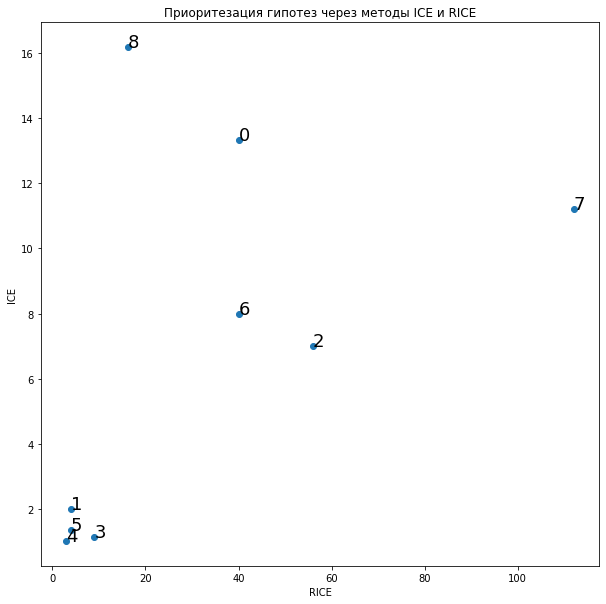

In [9]:
y = df['ICE'] 
z = df['RICE'] 
n = df.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=18)

plt.title("Приоритезация гипотез через методы ICE и RICE") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()  

## Анализ A/B теста

Перед непосредственным анализом откроем датафреймы для проверки качества данных:

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
display (orders.head())

visitors = pd.read_csv('/datasets/visitors.csv')
display (visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Взглянем на основную информацию по датафреймам, в т.ч. на типы данных в колонках:

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изучим датафреймы на наличие дубликатов и пустых значений:

In [13]:
print ('Количество пустых значений в orders:')
print (orders.isna().sum())
print ('Количество дубликатов в orders:', orders.duplicated().sum())

Количество пустых значений в orders:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов в orders: 0


In [14]:
print ('Количество пустых значений в visitors:')
print (visitors.isna().sum())
print ('Количество дубликатов в visitors:', visitors.duplicated().sum())

Количество пустых значений в visitors:
date        0
group       0
visitors    0
dtype: int64
Количество дубликатов в visitors: 0


Отлично, данные являются качественными, без дубликатов и пропущенных значений. Можно приступать к анализу.

Добавим информацию для дальнейшего анализа

Для начала посмотрим, какие группы присутствуют в тесте, а также сроки проведения эксперимента:

In [15]:
print ('Группы в A/B тесте: ', orders['group'].unique())
print ('Дата начала эксперимента: ',orders['date'].min())
print ('Дата окончания эксперимента: ',orders['date'].max())


Группы в A/B тесте:  ['B' 'A']
Дата начала эксперимента:  2019-08-01
Дата окончания эксперимента:  2019-08-31


Проверим, сколько пользователей ннаходится в группе А, и в группе В:


In [16]:
ordersA = orders[orders['group']=='A']
print (len(ordersA))
print (ordersA.head())

557
    transactionId   visitorId        date  revenue group
2      2961555356  4069496402  2019-08-15      400     A
7      2626614568    78758296  2019-08-15     1044     A
8      1576988021   295230930  2019-08-15    13710     A
10     3649131742   879864040  2019-08-15     4008     A
12     2809384911  3213223594  2019-08-15     7370     A


In [41]:
ordersB = orders[orders['group']=='B']['visitorId']
print (ordersB)
print (len(ordersB))

0       3312258926
1       3642806036
3       1196621759
4       2322279887
5        935554773
           ...    
1189     393266494
1190    1197745035
1191     608641596
1192    3733762160
1196    2108080724
Name: visitorId, Length: 640, dtype: int64
640


Проверим, сколько посещений было в каждой группе:

In [18]:
visitsA = visitors[visitors['group']=='A']
print (visitsA['visitors'].count())

31


In [19]:
visitsB = visitors[visitors['group']=='B']
print (visitsB['visitors'].count())

31


Проверим, есть ли пользователи, которые входят как в группу А, так и в группу В:

In [20]:
double_visitors = ordersA.query('visitorId in @ordersB')['visitorId']
print ('Пользователи, присутствующие и в группе А, и в группе В: ', double_visitors.count())

Пользователи, присутствующие и в группе А, и в группе В:  89


In [21]:
#код ревьюера

double_visitors.nunique()

58

Мы видим, что существуют 89 пользователей, которые попали в обе группы. Уберём их из данных для более корректного анализа.

In [22]:
orders = orders.query('visitorId not in @double_visitors')

Построим график кумулятивной выручки по группам:

Для начала создадим уникальные пары по дате-группе,  получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [23]:
grouped_dates = orders[['date','group']].drop_duplicates()

agreg_orders = grouped_dates.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                                      .agg({'date' : 'max', 'group' : 'max', 
                                                            'transactionId' : 'nunique', 
                                                            'visitorId' : 'nunique', 
                                                            'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

agreg_visitors = grouped_dates.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                       visitors['group'] == x['group'])]
                                                          .agg({'date' : 'max', 
                                                                'group' : 'max', 
                                                                'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = agreg_orders.merge(agreg_visitors, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


Теперь построим график кумулятивной выручки:

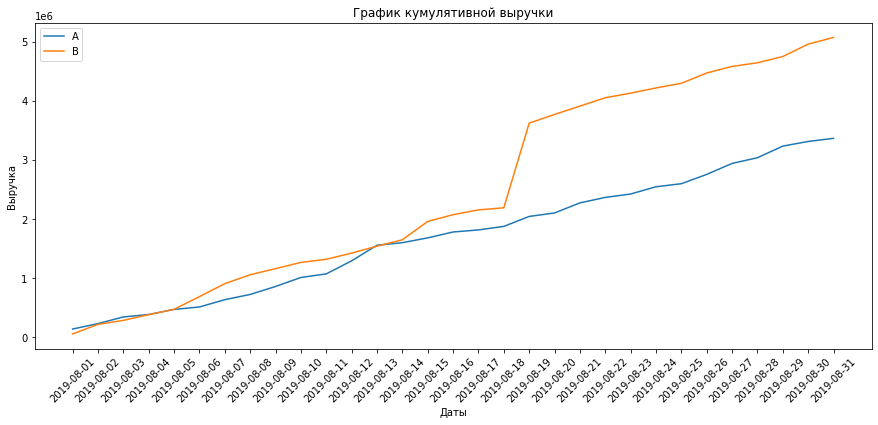

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки')    
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

На графиках видно, что выручка растёт в течение всего периода. У группы А рост плавный, практически равномерный, в то время как у группы B заметен резкий скачок с 18 августа. Это может быть свзязано с дорогими заказами, либо с увеличением числа чеков.  
Также можно отметить, что у группы А и группы В есть точка соприкосновения 13 августа.  


Построим график кумулятивного среднего чека по группам:

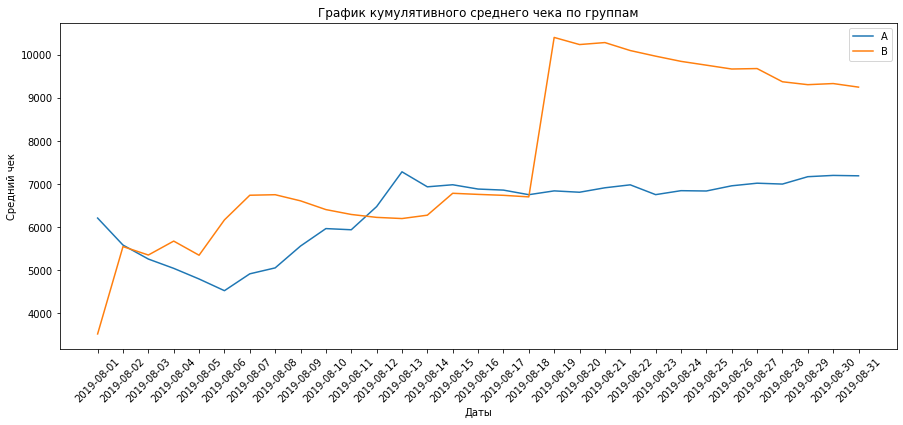

In [25]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')    
plt.xlabel('Даты')
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Анализируя средний чек в группах, у группы В также можно отметить 18 августа скачок. Следовательно, резкий рост выручки на прошлом графике всё же связан с покупкой дорогих товаров.
В начале исследуемого периода заметен спад 05.08 и 06.08 у группы В и А соответственно, нужно больше данных для подробного разбора этих скачков.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

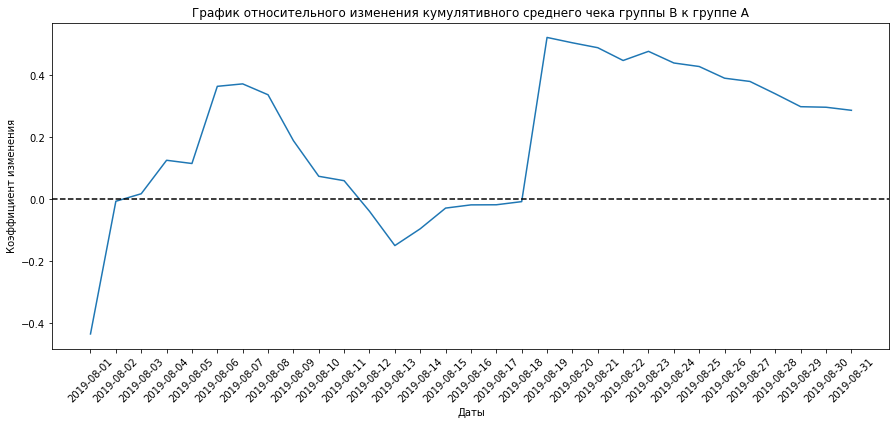

In [26]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')    
plt.xlabel('Даты')
plt.ylabel('Коэффициент изменения')

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])


plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])
         -1)

plt.axhline(y=0, color='black', linestyle='--');

График не равномерен, присутствуют сильные скачки. Это может быть обсуловлено как крупными заказами, так и выбросами.  
В целом средний чек в группе В выше, чем у группы А, однако 13 числа у группы В резкий спад. Как раз 13 числа была точка соприкосновения у группы А и В по количеству заказов.

Построим график кумулятивной конверсии по группам:

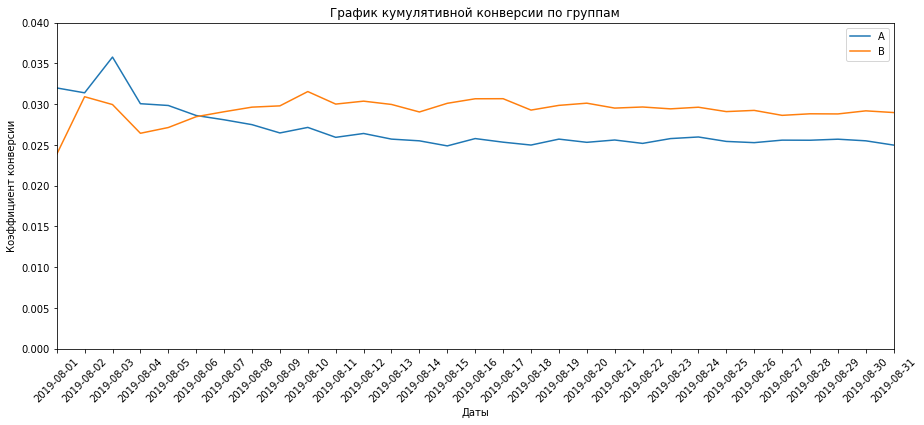

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии по группам')    
plt.xlabel('Даты')
plt.ylabel('Коэффициент конверсии')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


plt.axis(['2019-08-01', '2019-08-31', 0., 0.04]);


График получился в целом равномерным, обе группы колеблются около одного значения. 6 августа у группы А заметен спад, вто время как у группы В наблюдается резкий рост.

Теперь построим график относительного различия кумулятивных конверсий:

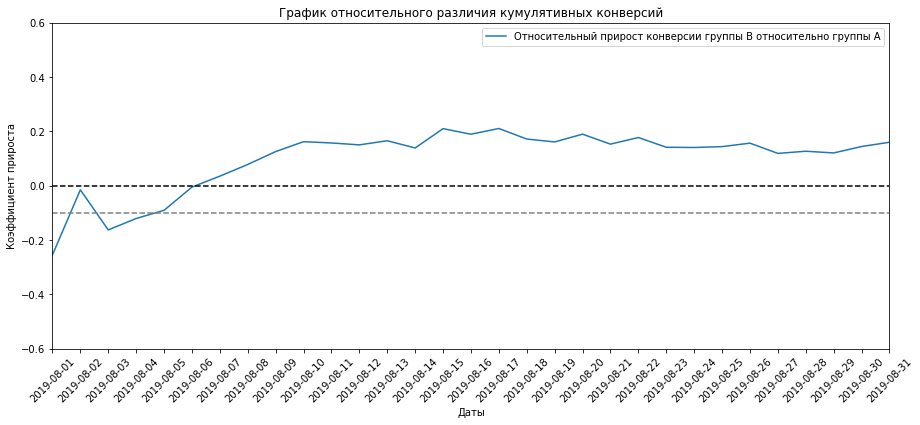

In [28]:
merg_cum_conver = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                               left_on='date', 
                                                               right_on='date', 
                                                               how='left', 
                                                               suffixes=['A', 'B'])

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('График относительного различия кумулятивных конверсий')    
plt.xlabel('Даты')
plt.ylabel('Коэффициент прироста')
plt.plot(merg_cum_conver['date'], 
         merg_cum_conver['conversionB']/merg_cum_conver['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]);

В начале группа В отрабатывала хуже группы А, однако после 6 августа конверсия вырастает и становится лучше, чем у группы А. Во второй половине месяца конверсия у группы В немного снижается, однако всё равно остаётся лучше первой группы. Также можно отметить, что прирост конверсии группы В выше 10%.

Необходимо понять, сколько выбросов и аномалий существует в данных. 
Для этого момжно построить точечный график количества заказов по пользователям:

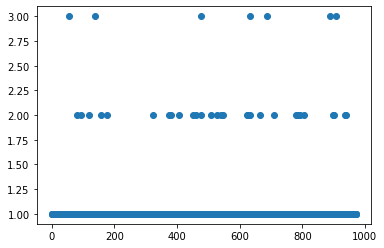

In [29]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']);

На графике видно, что большинство пользователей совершают один заказ, абсолютное большинство количества заказов не превышает 2, за редким исключением кто-то заказывает больше. Проверим, какой процент пользователей совершает 2 заказа.

Посчитаем перцентили количества заказов на одного пользователя:

In [30]:
perc_count_orders = np.percentile(ordersByUsers['orders'], [95, 99])
print(perc_count_orders)

[1. 2.]


Не более 5% пользователей оформляют не больше одного заказа. Возьмём 2 заказа за верхнюю границу.

Также для ограничения выбросов нужно понять, какие средние чеки являются аномаллиями, для этого визуализируем точечное распределение стоимостей заказов:

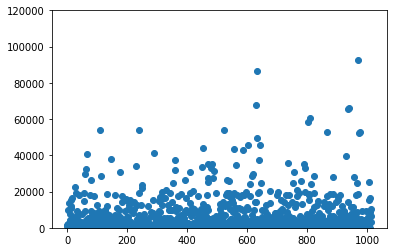

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylim([0, 120000]);

Большинство пользователей заказывают на сумму не более 20 000 рублей, максимальная сумма заказа составляет чуть менее 100 000 рублей. Проверим перцентили среднего чека, возьмём 95 и 99 перцентили.

Взглянем на 95-й и 99-й перцентили стоимости заказов:

In [32]:
perc_rev_orders = np.percentile(orders['revenue'], [95, 99])
print(perc_rev_orders)

[26785. 53904.]


Не больше 5% пользователей совершают заказ на сумму более 26 785 рублей. Также только 1% клиентов имеют средний чек больше 53 904 рублей. Далее в работе возмём 26 785 за верхнюю границу.

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным.  Для начала рассмотрим среднее число заказов.  

Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [33]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: ', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Конверсия: ',"{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))


P-value:  0.01679
Конверсия:  0.13808


Первый показатель — p-value - меньше 0.05. Получается, что нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. Относительный выигрыш группы B равен 13% - второй показатель.  
Проверим статистическую значимость различий в среднем чеке между сегментами.

Посмотрим на статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [35]:
print('P-value: ', '{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Конверсия: ','{0:.5f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value:  0.72929
Конверсия:  0.25871


P-value значительно больше 0.05. Видим, что нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия.  
Средний чек группы B значительно выше среднего чека группы A.
Разница в 26% не является статистически значимой.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > perc_count_orders[1]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > perc_count_orders[1]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > perc_rev_orders[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
Name: visitorId, dtype: int64
80


Всего 74 аномальных пользователя. Проверим, насколько они влияют на результат, исключим их из проверки.

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Для отсечения выбросов было принято решение использовать критерий Манна-Уитни, поскольку он как раз берёт во внимание только ранги, не обращая внимание на выбросы, сдвигающие результаты. Применим критерий к полученным выборкам:

In [38]:
print('P-value: ', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Конверсия: ','{0:.5f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value:  0.01635
Конверсия:  0.16810


Результаты по среднему количеству заказов практически не изменились.   
P-value меньше 0.05, а значит, нулевую гипотезу всё также можно отвергнуть, и присутствуют статистические значимые различия.  
  
Проверим, изменились ли показатели по среднему чеку, учитывая скорректированную выборку.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [39]:
print('P-value: ', '{0:.5f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                                np.logical_not(orders['visitorId']
                                                                               .isin(abnormalUsers)))]['revenue'],
                                          orders[np.logical_and(orders['group'] == 'B',
                                                                np.logical_not(orders['visitorId']
                                                                               .isin(abnormalUsers)))]['revenue'],)[1]
                      )
     )

print('Конверсия: ',"{0:.5f}".format(orders[np.logical_and(orders['group'] == 'B',
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                       ['revenue'].mean()
                       / orders[np.logical_and(orders['group'] == 'A',
                                               np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                       ['revenue'].mean()
                       - 1
                      )
     )

P-value:  0.65033
Конверсия:  -0.03315


P-value практически не изменился, слегка увеличился, он больше 0.05. Нулевую гипотезу отвергнуть мы не можем, и статистические значимые различия отсутствуют. Однако разница между сегментами сильная, потому что произошёл спад до 3%.  


Таким образом, можно считать тест успешным, подробнее можно ознакомиться с выводом чуть ниже.

## Вывод

Для анализа результатов теста A/B было проведено исследование на основе предоставленных статистических данных. Исследование состояло из нескольких этапов:  
1.  Обзор, предобработка данных и приоритезация гипотез;  
3.	Анализ данных проведённого A/B теста;
4.	Вывод и рекомендации по произведённому анализу.



**Первый этап**  
Для более корректного и наглядного отображения данных:  
* ознакомились с предоставленными данными;  
* проверили данные на пустые значения и дубликаты;  
* проверили типы данных.  

Что касается использования методов ICE и RICE:  
1. После применения ICE можно заметить, что в первую тройку вошли 8, 0 и 7 гипотезы. Однако следует посмотреть, как изменится порядок, если мы применим RICE, который в отличие от ICE, учитывает кол-во пользователей, которых затронет наше изменение.  Таким образом, запустить акцию, дающую скидку на товар в день рождения является наиболее приоритетной.  

2. После применения RICE, который в отличие от ICE, учитывает кол-во пользователей, которых затронет наше изменение, видно, что приоритезация изменилась. Теперь 8 гипотеза, находящаяся на первом месте, сместилась на 5 строку. 0 гипотеза попала на второе место, в то время как 7 встала на первой строке. Также 2 гипотеза оказалась на втором месте, хотя ранее она была на пятом. Самая приоритетная гипотеза теперь - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.




**Второй этап**  
Были выявлены 89 пользователей, которые находятся в обеих группах сразу. Было принято решение отбросить их для более корректного анализа.  

В ходе анализа предоставленных данных были выявлены следующие моменты:  

1. На графике кумулятивной выручки видно, что выручка растёт в течение всего периода. У группы А рост плавный, практически равномерный, в то время как у группы B заметен резкий скачок с 18 августа. Это может быть свзязано с дорогими заказами, либо с увеличением числа чеков. Также можно отметить, что у группы А и группы В есть точка соприкосновения 13 августа.  


2. Анализируя средний чек в группах через график кумулятивного среднего чека, у группы В также можно отметить 18 августа скачок. Следовательно, резкий рост выручки на прошлом графике всё же связан с покупкой дорогих товаров. В начале исследуемого периода заметен спад 05.08 и 06.08 у группы В и А соответственно, нужно больше данных для подробного разбора этих скачков.  


3. График относительного изменения кумулятивного среднего чека группы B к группе A не равномерен, присутствуют сильные скачки. Это может быть обсуловлено как крупными заказами, так и выбросами. В целом средний чек в группе В выше, чем у группы А, однако 13 числа у группы В резкий спад. Как раз 13 числа была точка соприкосновения у группы А и В по количеству заказов.  


4. График кумулятивной конверсии по группам получился в целом равномерным, обе группы колеблются около одного значения. 6 августа у группы А заметен спад, в то время как у группы В наблюдается резкий рост.  


5. Согласно графику относительного различия кумулятивных конверсий: в начале группа В отрабатывала хуже группы А, однако после 06 августа конверсия вырастает и становится лучше, чем у группы А. Во второй половине месяца конверсия у группы В немного снижается, однако всё равно остаётся лучше первой группы. Также можно отметить, что прирост конверсии группы В выше 10%.  


6. На точечном графике количества заказов по пользователям видно, что большинство пользователей совершают один заказ, абсолютное большинство количества заказов не превышает 2, за редким исключением кто-то заказывает больше.  
После вычисления перцентилей можно сказать, что не более 5% пользователей оформляют больше двух заказов. И только 1% совершают больше, чем 4 заказа. Для дальнейшего анализа было принято решение взять 2 заказа за верхнюю границу.  


7. Согласно точечному распределению стоимостей заказов большинство пользователей заказывают на сумму не более 20 000 рублей, максимальная сумма заказа составляет чуть менее 100 000 рублей.  
Вычислив перцентили, устанавливается, что не больше 5% пользователей совершают заказ на сумму более 28 000 рублей. Также только 1% клиентов имеют средний чек больше 58 000 рублей. Далее в работе 28 000 рублей будет считаться верхней границей при очищении данных.  


8. Если смотреть статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным, то нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, можно отвергнуть. P-value равен 0.017. Относительный выигрыш группы B равен 14% - второй показатель.  


9. Если смотреть статистическую значимость различий в среднем чеке между сегментами, p-value значительно больше 0.05 и составляет 0.729. Видим, что нет причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. Средний чек группы B значительно выше среднего чека группы A, на 26%.  
 

10. Аномальными можно считать 80 пользователя, у которых либо сумма заказа выше 26 785 рублей, либо у них больше 2 заказов в интернет-магазине.


11. После очищения данных статистическая значимость различий в среднем количестве заказов между группами теста сильно не изменилась, p-value составляет 0.016, и группа B выигрывает на 17%.  
  

12. После очищения данных статистическая значимость различий в среднем чеке заказа между группами  тоже не меняется, p-value составляет 0.65. Однако группа В проигрывает группе А на 3%. Это связано именно с выбросами в дорогих чеках, которые мы ранее видели в анализе.



**Третий этап**  

Учитывая проделанный анализ, можно сделать следующие вывод:  
Принято решение признать тест успешным, поскольку нулевая гипотеза по количеству заказов отвергнута как по сырым данным, так и по очищенным. Продолжать тест нет смысла, поскольку 95% клиентов совершают не более 2 заказов, поэтому продолжать тестирование дольше месяца нерационально.  В целом группа B лучше по всем показателям, однако стоит помнить, что выбросы скорректировали их средний чек, и по статистической значимости не удалось отвергнуть нулевую гипотезу.

